## Hypothesis Testing

## Introduction :
The General Social Survey (http://gss.norc.org) is a sociological survey created and regularly collected since 1972 by the National Opinion Research Center at the University of Chicago. It gathers information and keeps a historical record of the concerns, experiences, attitudes, and practices of residents of the United States.

The survey questions encompass a wide variety of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.

### Data Collection
The data collection method is a face to face survey interview by NORC at the University of Chicago. The target population is adults(18+ years of age) living in United States households. The GSS sample is drawn using an area probability design that randomly selects respondents in households across the United States to take part in the survey.Respondents that become part of the GSS sample are from a mix of urban, suburban, and rural geographic areas. Participation in the study is strictly voluntary.

The dataset used for this journal entry is an extract of GSS cumulative file from 1972 to 2012. As the survey is based on random sampling of adult US residents and has 57061 observations, the population of interest is the residents of United States. However the findings of the study can't be generalized to the entire population, as the data may not be representative of entire population of United States.This is due to the fact that not all respondents answered all questions in all years,leading to a non response bias.Hence,it is unclear whether the data is representative of entire population.

I have attempted to answer two questions by hypothesis testing in this journal entry.

#### Question 1: Is there a relationship/association between how often do the respondents read news and confidence in press?  

According to the http://news.gallup.com/poll/157589/distrust-media-hits-new-high.aspx, american's distrust in media hit a new high in 2012. This article motivated me analyse how frequency of reading news may impact an american's confidence in press.

The objective of this observational study is to establish association between the following two variables:
* news : frequency of reading news
* conpress : confidence in press

Since the two variables are categorical in nature, Chi-Squared test is used to draw the statistical inference.
It allows us to quantify how different are the observed counts from the expected counts. 

In [142]:
# Import the libraries
library(ggplot2)
library(dplyr)
library(lattice)
library(repr)

In [84]:
# Load the GSS data
load(url("http://bit.ly/dasi_gss_data"))

In [117]:
print (paste("No. of observtaion :",dim(gss)[1]))
print (paste("No. of variables :",dim(gss)[2]))

[1] "No. of observtaion : 57061"
[1] "No. of variables : 114"


The GSS data has 57061 obs. of  114 variables. The variables under study for this question are: 
* news - How often do respondents read newspaper?
* conpress - Confidence in press.

In [139]:
# Filtering the data for more recent years 2010 onwards
data <- gss[ which(gss$year >= 2010 & !is.na(gss$news) & !is.na(gss$conpress)), ]
data <- data %>% select(news, conpress)

#### Data Exploration

In [51]:
str(data)

'data.frame':	1398 obs. of  2 variables:
 $ news    : Factor w/ 5 levels "Everyday","Few Times A Week",..: 2 2 3 5 1 2 3 5 4 1 ...
 $ conpress: Factor w/ 3 levels "A Great Deal",..: 2 3 1 2 2 3 2 1 3 3 ...


1368 randomly sampled observations with 2 variables(news and conpress).Let's look at the contigency table.

In [101]:
table(data$news,data$conpress)

                   
                    A Great Deal Only Some Hardly Any
  Everyday                    50       206        196
  Few Times A Week            18       111        112
  Once A Week                 19        85         88
  Less Than Once Wk           18        97        109
  Never                       24       113        152

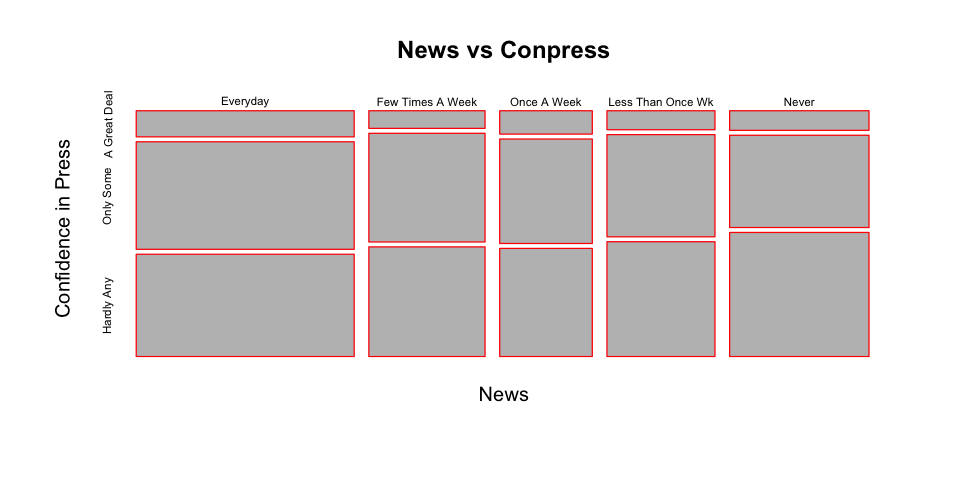

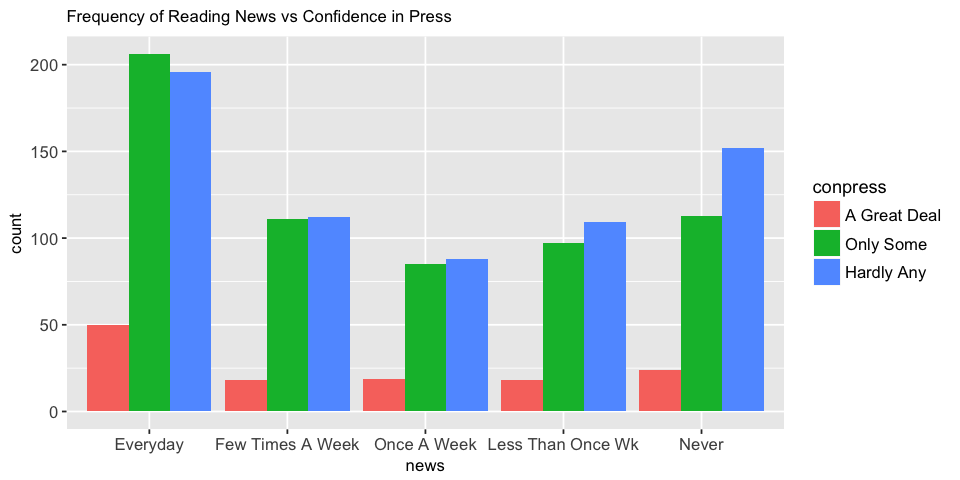

In [143]:
#Setting the plot figure size
options(repr.plot.width=8, repr.plot.height=4)

# mosaic plot for categorical variables
tab<-table(data$news,data$conpress)
mosaicplot(tab,xlab="News",ylab="Confidence in Press",main ="News vs Conpress",border='red',cex.axis = 0.58)

# bar plot to calculate the count across all the groups
ggplot(aes(x=news),data=data) + 
geom_bar(aes(fill=conpress),position=position_dodge()) +
ggtitle('Frequency of Reading News vs Confidence in Press') +
theme(axis.text=element_text(size=10),axis.title=element_text(size=10))+
theme(plot.title=element_text(size=10))+
theme(legend.text=element_text(size=10))

* The size of the boxes in the mosaicplot can be compared to the bar graph. Out of the respondents who read everyday, people who have only some confidence in press are highest in number. Like wise, out of the respondents who read few times a week, people who have great deal of confidence in press are lowest in number.

* The no. of respondents who have great deal of confidence in press is consistently low across all groups of news reader.

* The no. of respondents who hardly have any confidence in press is highest in all the groups of news readers except who read news everyday.


#### Hypothesis Testing
#### State the hypothesis:

* **Null Hypothesis : **  Frequency of reading news and confidence in press are independent of each other.
* **Alternate Hypothesis : ** Frequency of reading news and confidence in press are related. Frequency of reading news varies by confidence in press and vice versa.


#### Check conditions:
* Independence: The respondents were sampled randomly and independent.
* If sampling without replacement, no. of observations should be less than 10% of population.
* Each case only contributes to one cell in the table.
* Each particular scenario(i.e a cell) must have atleast 5 expected counts.


##### The data used for this test has 1398 ramdomly sampled cases.Hence, the sample size is large enough to meet the criteria of Independence and Sample Size.

In [148]:
#Expected counts 
data_table <- table(data$news, data$conpress)
Xsq <- chisq.test(data_table)
Xsq$expected

,A Great Deal,Only Some,Hardly Any
Everyday,41.70815,197.87124,212.42060
Few Times A Week,22.23820,105.50215,113.25966
Once A Week,17.71674,84.05150,90.23176
Less Than Once Wk,20.66953,98.06009,105.27039
Never,26.66738,126.51502,135.81760


The table above represents the expected counts under null hypothesis. And the table below is the obseved counts which is the observed data.

In [149]:
# Observed counts same as actual table
Xsq$observed

                   
                    A Great Deal Only Some Hardly Any
  Everyday                    50       206        196
  Few Times A Week            18       111        112
  Once A Week                 19        85         88
  Less Than Once Wk           18        97        109
  Never                       24       113        152

#### Calculate the test statistic|p-value and perform the inference:

In [107]:
Xsq<-chisq.test(data_table)
Xsq


	Pearson's Chi-squared test

data:  data_table
X-squared = 8.6459, df = 8, p-value = 0.373


The Chi-Squared test statistic is 8.64 and degrees of freedom is 8. The p-value of 0.373 is greater than the significance level(alpha level : 0.05).

Hence, we fail to reject null hypothesis and can say that the data does not provide convincing evidence of association between frequency of reading news and confidence in press.

#### Question2: Is there a disparity of income between different races of U.S population? 

The existence of racial wage gap in United States is well known https://en.wikipedia.org/wiki/Racial_wage_gap_in_the_United_States. 

The prompts me to hypothesize my second question to draw statistical inference about the income disparity by comparing family income across different races(using GSS dataset again) in the U.S.

The objective of this analysis is to find out whether there is a difference in average family income across different racial groups in the U.S

The following two variables are used: 
* race: Race of respondent
* coninc: Total family income in constant dollars

Since it is multiple comparison case, Kruskal-Wallis test, and pairwise t test with bonferroni correction is used to draw the inference.

In [152]:
# Load the dataset
incdata <- gss[ which(!is.na(gss$race) & !is.na(gss$coninc)), ]
incdata <- incdata %>% select(race, coninc)

In [153]:
str(incdata)

'data.frame':	51232 obs. of  2 variables:
 $ race  : Factor w/ 3 levels "White","Black",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ coninc: int  25926 33333 33333 41667 69444 60185 50926 18519 3704 25926 ...


51232 randomly sampled observations with 2 variables(race and coninc).

incdata$race: White
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383   20129   38414   47007   62946  180386 
------------------------------------------------------------ 
incdata$race: Black
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383    9953   21959   30185   41523  180386 
------------------------------------------------------------ 
incdata$race: Other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383   15572   30861   42415   56059  180386 

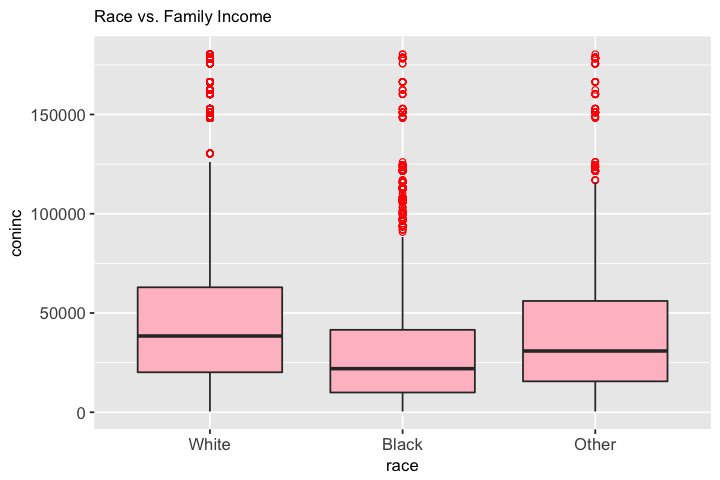

In [154]:
# Boxplot to visualize the income distribution
options(repr.plot.width=6, repr.plot.height=4)

ggplot(aes(x=race, y=coninc), data=incdata) + geom_boxplot(fill = "pink",outlier.colour = "red", outlier.shape = 1) + ggtitle('Race vs. Family Income')+
theme(axis.text=element_text(size=10),axis.title=element_text(size=10))+
theme(plot.title=element_text(size=10))
by(incdata$coninc, incdata$race,summary)

Clearly, the distribution of family income is skewed to the right across all the groups. Whites are highest income group. And the blacks have lowest variability in their family income.

#### Hypothesis

#### State the hypothesis:

* **Null Hypothesis : ** There is no disparity of average family income between different races. The average family income is same across all racial groups.
* **Alternate Hypothesis : ** The average family income is different between at least one pair of the racial groups.

#### Check conditions:
* Independence: 
     + The survey respondents were sampled randomly and the samples size is less than 10% of population. So the condition of independence is met within each group.
     + There are three race groups which are independent of each other.
* Homogenity of variance across all the groups: 
     + From above boxplot, it seems that the variability is consistent across “White” and “Other” groups, but it is much lower for the “Black” group.
* Distribution of response variable in each racial group should be approximately normal. 
     + The QQ plots in the following sections show that there is quite a bit divergence from normality in the upper tail in all the three groups.

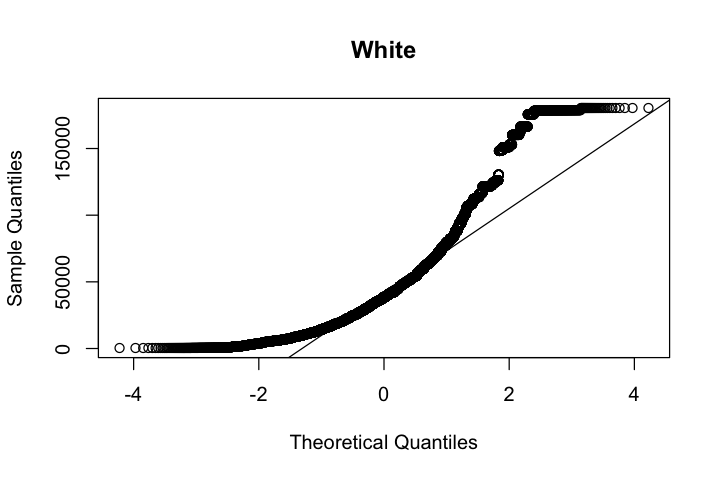

In [155]:
# QQ plot for whites
qqnorm(incdata$coninc[incdata$race=='White'], main="White")
qqline(incdata$coninc[incdata$race=='White'])

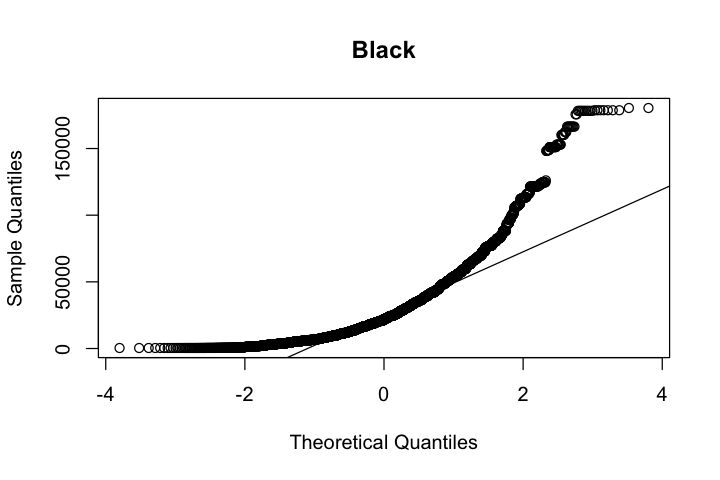

In [156]:
#QQ plot for blacks
qqnorm(incdata$coninc[incdata$race=='Black'], main="Black")
qqline(incdata$coninc[incdata$race=='Black'])

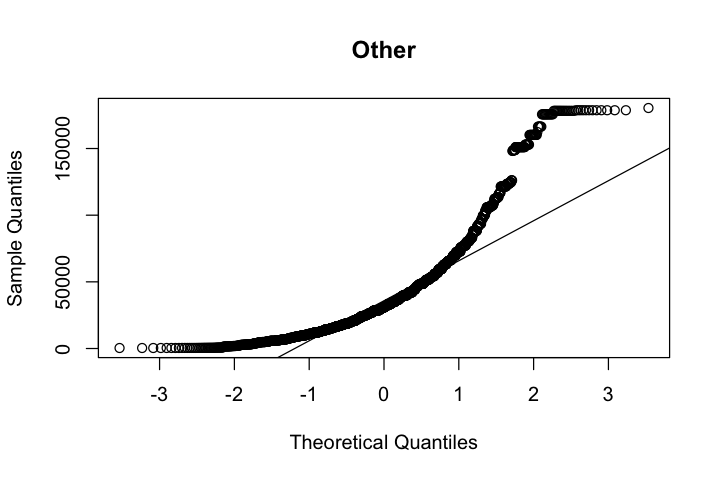

In [157]:
# QQ plot for Other racial group
qqnorm(incdata$coninc[incdata$race=='Other'], main="Other")
qqline(incdata$coninc[incdata$race=='Other'])

The conditions of normality and homogenity of variance are not met which is a requirement for ANOVA.

If we have to perform the comparison between multiple groups, but we can not run ANOVA for multiple comparisons because the groups do not follow a normal distribution, we can use the Kruskal-Wallis test. The Kruskal-Wallis test can be applied when we can not make the assumption that the groups follow a gaussian distribution.

So, we will go ahead and apply kruskal.test.

In [158]:
# Kruskal-Wallis test that is robust to normality assumption
kruskal.test(coninc ~ race, data = incdata)


	Kruskal-Wallis rank sum test

data:  coninc by race
Kruskal-Wallis chi-squared = 1855.8, df = 2, p-value < 2.2e-16


Extremely small p-value(almost zero) allows us to reject null hypothesis. Hence, we can say that the data provides convincing evidence about the average family income disparity between at least one pair of groups.

Since, the result of kruskal.test allowed us to reject null hypothesis, let's do a pairwise comparison to find out which pair of groups have difference in average family income.

This is a multiple comparison test. That means multiple hypothesis are being tested. So, the chance of a rare event increases, and therefore, the likelihood of incorrectly rejecting a null hypothesis (i.e., making a Type I error) increases. Hence, it is appropriate to use bonferroni adjustment to compensate for that increase by testing each individual hypothesis at a significance level of alpha/m, where alpha is the desired overall alpha level and  m is the number of hypotheses.

In [135]:
# pairwise t test for multiple comparisons
pairwise.t.test(incdata$coninc, incdata$race, p.adj ='bonferroni')


	Pairwise comparisons using t tests with pooled SD 

data:  incdata$coninc and incdata$race 

      White   Black  
Black < 2e-16 -      
Other 1.4e-09 < 2e-16

P value adjustment method: bonferroni 

Despite of using a very stringent bonferroni correction while performing the pairwise comparison test, extremely small p-values in all the groups (White-Black, White-Other and Black-Other) allows us to reject null hypothesis again. 

Hence, we can say that the data provides convincing evidence about the disparity of average family income between all the groups(White-Black, White-Other and Black-Other).

### Final thoughts:

In this journal entry, I used Chi-Sq test, Kruskal-Wallis test and pairwise t test with bonferroni correction to draw statistical inference using GSS dataset. 

As this dataset is quite comprehensive many more observational studies can be conducted on other variables. Also besides, using hypothesis testing to draw statistical inference, confidence interval can also be calculated to estimate the range of values at a given confidence level that contain true population parameter. 